## Instalación de librerías

In [1]:
#Instalacion de librerias 
!pip install geopandas
!pip install rtree
!pip install pygeos

!pip install dython
!pip install yellowbrick

## Librerías

In [2]:
#Importacion de librerias

import pandas as pd
import numpy as np
import geopandas as gpd

import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap as HM
from folium.plugins import FeatureGroupSubGroup
from folium.plugins import HeatMap as HM

import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Segundo ejercicio
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from dython import nominal
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#Tercer Ejercicio
from sklearn.linear_model import LinearRegression
import datetime
from scipy import stats
import seaborn as sns
from datetime import date


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## Datos

In [3]:
###### Variables ###########

### Fuentes
#https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data -> Datos temporales
#https://datos.cdmx.gob.mx/dataset/infraestructura-vial-ciclista/resource/1cf94274-0bf6-4220-b959-8aa0ec68a326 -> datos Geo


### Notación
# Genero: M/F
# Edad: Flotante
# Bici: ID de la bicicleta
# Ciclo_Estacion_Retiro: ID de la estación de salida
# Fecha_Retiro : Dia que salio la bici
# Hora_Retiro: Hora que salio la bici
# Ciclo_EstacionArribo : ID de la estacion que llegó la bici 

df1 = pd.read_csv("2021-08 Ecobici.csv")
df2 = pd.read_csv("2021-09 Ecobici.csv")
df3 = pd.read_csv("2021-10 Ecobici.csv")
estaciones = gpd.read_file("ECOBICI_Cicloestaciones.shp")
estaciones.drop_duplicates(subset ="CVE_CE", keep="first", inplace = True)
estaciones

,SISTEMA,NOMBRE,CP,COLONIA,TIPO,CE_CERCA0,CE_CERCA_1,CE_CERCA_2,CE_CERCA_3,CE_CERCA_4,CE_CERCA_5,CVE_CE,geometry
0,ECOBICI,Río Sena-Río Balsas,6500,Cuauhtémoc,"BIKE,TPV",3,8,85,0,0,0,001,POINT (-99.16781 19.43357)
1,ECOBICI,Río Guadalquivir - Río Balsas,6500,Cuauhtémoc,BIKE,1,5,0,0,0,0,002,POINT (-99.17169 19.43139)
2,ECOBICI,Reforma - Insurgentes,6500,Ampliación Granada,"BIKE,TPV",8,20,86,0,0,0,003,POINT (-99.15867 19.43165)
3,ECOBICI,Río Nilo - Río Panuco,6500,Cuauhtémoc,BIKE,5,8,9,10,0,0,004,POINT (-99.17171 19.42831)
4,ECOBICI,Río Pánuco Río Tiber,6500,Cuauhtémoc,BIKE,2,4,9,10,0,0,005,POINT (-99.16936 19.42972)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,ECOBICI,Lago Como-Laguna de Mayrán,0,Granada,"BIKE,TPV",475,477,0,0,0,0,476,POINT (-99.18443 19.44213)
475,ECOBICI,Lago Iseo-Laguna de Mayrán,0,Anáhuac I,BIKE,475,476,478,0,0,0,477,POINT (-99.18174 19.44091)
476,ECOBICI,Laguna de Mayrán-Lago Chalco,0,Anáhuac I,BIKE,473,474,477,0,0,0,478,POINT (-99.17696 19.44082)
477,ECOBICI,Lago Muritz-Av.Marina Nacional,0,Anáhuac Mariano Escobedo,ELECTRIC_BIKE,467,469,472,476,477,478,479,POINT (-99.17966 19.44443)


In [4]:
#Eliminación de registros incompletos

print(df1.shape)
df1 = df1.dropna()
print(df1.shape)

print(df2.shape)
df2 = df2.dropna()
print(df2.shape)

print(df3.shape)
df3 = df3.dropna()
print(df3.shape)

#335459/354267 # -> Se mantienen 94% de los datos df1
#338354/345209 # Se mantiene el 98% de los datos df2
#403518/414881 # Se mantienen 97% de los datos df3

(354267, 9)
(335459, 9)
(345209, 9)
(338354, 9)
(414881, 9)
(403518, 9)


In [5]:
#Unión de los 3 meses en un solo DataFrame
df_bicis = pd.concat([df1, df2, df3], ignore_index=True)
df_bicis

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo
0,M,28.0,11302.0,73.0,31/07/2021,23:57:44,62.0,01/08/2021,00:00:08
1,M,33.0,10571.0,121.0,31/07/2021,23:54:00,143.0,01/08/2021,00:00:59
2,M,19.0,12451.0,132.0,31/07/2021,23:52:58,122.0,01/08/2021,00:01:24
3,M,32.0,8314.0,7.0,31/07/2021,23:23:41,7.0,01/08/2021,00:01:25
4,F,36.0,7993.0,7.0,31/07/2021,23:23:17,7.0,01/08/2021,00:01:32
...,...,...,...,...,...,...,...,...,...
1077326,M,26.0,4048.0,15.0,31/10/2021,23:44:58,208.0,31/10/2021,23:57:15
1077327,M,31.0,8379.0,25.0,31/10/2021,23:42:11,29.0,31/10/2021,23:57:41
1077328,M,30.0,7264.0,275.0,31/10/2021,23:33:55,45.0,31/10/2021,23:58:05
1077329,M,28.0,12528.0,59.0,31/10/2021,23:53:34,83.0,31/10/2021,23:58:52


## Problema 1

¿En qué horarios hay mayor afluencia y en qué estaciones? Da una breve
descripción de por qué crees que es así. Si consideras remover outliers, justifica el
método que empleaste y, en caso de que no remuevas outliers, argumenta
estadísticamente tu decisión.

In [6]:
# Conteo de retiros de bicis para cada estación

top10R = df_bicis["Ciclo_Estacion_Retiro"].value_counts().head(10)
top10R = pd.DataFrame(top10R)
top10R.reset_index(inplace=True)
top10R.columns=(["Ciclo_Estacion_Retiro","Conteo"])
top10R["Ciclo_Estacion_Retiro"] = top10R["Ciclo_Estacion_Retiro"].astype(int)
top10R

,Ciclo_Estacion_Retiro,Conteo
0,271,8392
1,1,8379
2,41,8210
3,64,7414
4,27,7412
5,182,7042
6,36,6610
7,38,6150
8,136,5842
9,174,5602


In [7]:
# Conteo de arribos para cada estación

top10A = df_bicis["Ciclo_EstacionArribo"].value_counts().head(10)
top10A = pd.DataFrame(top10A)
top10A.reset_index(inplace=True)
top10A.columns=(["Ciclo_EstacionArribo","Conteo"])
top10A["Ciclo_EstacionArribo"] = top10A["Ciclo_EstacionArribo"].astype(int)
top10A

,Ciclo_EstacionArribo,Conteo
0,271,8783
1,1,8756
2,64,7868
3,266,7720
4,27,7575
5,41,7148
6,182,7033
7,36,6839
8,38,6555
9,136,6082


In [8]:
#Transformación de la clave de la estación cadena -> entero

estaciones["CVE_CE"] = estaciones["CVE_CE"].astype(int)
estaciones.tail()

,SISTEMA,NOMBRE,CP,COLONIA,TIPO,CE_CERCA0,CE_CERCA_1,CE_CERCA_2,CE_CERCA_3,CE_CERCA_4,CE_CERCA_5,CVE_CE,geometry
474,ECOBICI,Lago Como-Laguna de Mayrán,0,Granada,"BIKE,TPV",475,477,0,0,0,0,476,POINT (-99.18443 19.44213)
475,ECOBICI,Lago Iseo-Laguna de Mayrán,0,Anáhuac I,BIKE,475,476,478,0,0,0,477,POINT (-99.18174 19.44091)
476,ECOBICI,Laguna de Mayrán-Lago Chalco,0,Anáhuac I,BIKE,473,474,477,0,0,0,478,POINT (-99.17696 19.44082)
477,ECOBICI,Lago Muritz-Av.Marina Nacional,0,Anáhuac Mariano Escobedo,ELECTRIC_BIKE,467,469,472,476,477,478,479,POINT (-99.17966 19.44443)
478,ECOBICI,Lago Iseo-Av. Marina Nacional,0,Anáhuac Mariano Escobedo,BIKE,476,477,478,0,0,0,480,POINT (-99.18165 19.44607)


In [9]:
# Join de estaciones con su posición espacial (Arribos)

Arribo = estaciones.merge(top10A, how="inner", right_on="Ciclo_EstacionArribo", left_on="CVE_CE")
Arribo=Arribo[["Ciclo_EstacionArribo","Conteo","geometry"]]
Arribo["lon"] = Arribo.centroid.map(lambda p: p.x)
Arribo["lat"] = Arribo.centroid.map(lambda p: p.y)
Arribo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,Ciclo_EstacionArribo,Conteo,geometry,lon,lat
0,1,8756,POINT (-99.16781 19.43357),-99.167809,19.433571
1,27,7575,POINT (-99.16261 19.42911),-99.162614,19.429115
2,36,6839,POINT (-99.17578 19.41972),-99.175778,19.419725
3,38,6555,POINT (-99.17141 19.42080),-99.171407,19.420801
4,41,7148,POINT (-99.15014 19.43564),-99.150137,19.435637
5,64,7868,POINT (-99.16699 19.41288),-99.166986,19.412877
6,136,6082,POINT (-99.16273 19.41772),-99.162729,19.417715
7,182,7033,POINT (-99.17139 19.40209),-99.171390,19.402089
8,266,7720,POINT (-99.15219 19.44403),-99.152187,19.444031
9,271,8783,POINT (-99.15252 19.44393),-99.152525,19.443928


In [10]:
# Join de estaciones con su posición espacial (Retiros)

Retiro = estaciones.merge(top10R, how="inner", right_on="Ciclo_Estacion_Retiro", left_on="CVE_CE")
Retiro=Retiro[["Ciclo_Estacion_Retiro","Conteo","geometry", "NOMBRE"]]
Retiro['lon'] = Retiro.centroid.x  
Retiro['lat'] = Retiro.centroid.y
Retiro

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,Ciclo_Estacion_Retiro,Conteo,geometry,NOMBRE,lon,lat
0,1,8379,POINT (-99.16781 19.43357),Río Sena-Río Balsas,-99.167809,19.433571
1,27,7412,POINT (-99.16261 19.42911),Reforma- Havre,-99.162614,19.429115
2,36,6610,POINT (-99.17578 19.41972),Puebla - Veracruz,-99.175778,19.419725
3,38,6150,POINT (-99.17141 19.42080),Cozumel - Puebla,-99.171407,19.420801
4,41,8210,POINT (-99.15014 19.43564),Reforma - Av. de la República,-99.150137,19.435637
5,64,7414,POINT (-99.16699 19.41288),Sonora - Amsterdam,-99.166986,19.412877
6,136,5842,POINT (-99.16273 19.41772),Tonalá-Álvaro Obregón,-99.162729,19.417715
7,174,5602,POINT (-99.16164 19.44111),Joaquín Garcia-Ignacio Manuel Altamirano,-99.161640,19.441110
8,182,7042,POINT (-99.17139 19.40209),Progreso-Astronomos,-99.171390,19.402089
9,271,8392,POINT (-99.15252 19.44393),Av. Jesús García - J. Meneses,-99.152525,19.443928


In [11]:
# Primera Visualización top 10 de retiros y arribos

m=folium.Map(location=[19.389485, -99.078364],zoom_start=12)

mcg = MarkerCluster(control=False)
m.add_child(mcg)

g1 = FeatureGroupSubGroup(mcg, 'Arribo')
m.add_child(g1)
g2 = FeatureGroupSubGroup(mcg, 'Retiro')
m.add_child(g2)

l = folium.LayerControl().add_to(m)

for lat,lng,text in zip(Arribo["lat"], Arribo["lon"],Arribo["Conteo"].astype(str)):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="green"),
  ).add_to(g1)


for lat,lng,text in zip(Retiro["lat"], Retiro["lon"],Retiro["Conteo"].astype(str)):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="red"),
  ).add_to(g2)


m

In [12]:
#Visualización top 10 de retiros y arribos en barras

fig = make_subplots(rows=2, cols=1,x_title= "Estaciones", y_title="Conteo")

fig.append_trace(go.Bar(
    name='Arribo', x=Arribo["Ciclo_EstacionArribo"].astype(str), y=Arribo["Conteo"],
), row=1, col=1),

fig.append_trace(go.Bar(
    name='Retiro', x=Retiro["Ciclo_Estacion_Retiro"].astype(str), y=Retiro["Conteo"],
), row=2, col=1)

# Change the bar mode
fig.update_layout(barmode='group',
                  title="Top 10 de estaciones con mayor afluencia.",)
fig.show()

### Por tiempo

In [13]:
# Extraer únicamente la hora de retiro y arribo

df_bicis['Hora_Retiro'] = pd.to_datetime(df_bicis['Hora_Retiro'])
df_bicis['hora_ret'] = df_bicis['Hora_Retiro'].dt.hour

df_bicis['Hora_Arribo'] = pd.to_datetime(df_bicis['Hora_Arribo'])
df_bicis['hora_arr'] = df_bicis['Hora_Arribo'].dt.hour

df_bicis

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_EstacionArribo,Fecha Arribo,Hora_Arribo,hora_ret,hora_arr
0,M,28.0,11302.0,73.0,31/07/2021,2022-03-15 23:57:44,62.0,01/08/2021,2022-03-15 00:00:08,23,0
1,M,33.0,10571.0,121.0,31/07/2021,2022-03-15 23:54:00,143.0,01/08/2021,2022-03-15 00:00:59,23,0
2,M,19.0,12451.0,132.0,31/07/2021,2022-03-15 23:52:58,122.0,01/08/2021,2022-03-15 00:01:24,23,0
3,M,32.0,8314.0,7.0,31/07/2021,2022-03-15 23:23:41,7.0,01/08/2021,2022-03-15 00:01:25,23,0
4,F,36.0,7993.0,7.0,31/07/2021,2022-03-15 23:23:17,7.0,01/08/2021,2022-03-15 00:01:32,23,0
...,...,...,...,...,...,...,...,...,...,...,...
1077326,M,26.0,4048.0,15.0,31/10/2021,2022-03-15 23:44:58,208.0,31/10/2021,2022-03-15 23:57:15,23,23
1077327,M,31.0,8379.0,25.0,31/10/2021,2022-03-15 23:42:11,29.0,31/10/2021,2022-03-15 23:57:41,23,23
1077328,M,30.0,7264.0,275.0,31/10/2021,2022-03-15 23:33:55,45.0,31/10/2021,2022-03-15 23:58:05,23,23
1077329,M,28.0,12528.0,59.0,31/10/2021,2022-03-15 23:53:34,83.0,31/10/2021,2022-03-15 23:58:52,23,23


In [14]:
# Conteo de retiros por hora

HoraR = df_bicis["hora_ret"].value_counts()
HoraR = pd.DataFrame(HoraR)
HoraR.reset_index(inplace=True)
HoraR.columns=(["Hora","Conteo"])
HoraR

,Hora,Conteo
0,18,87197
1,14,86227
2,15,81058
3,13,76396
4,17,73765
5,8,73609
6,19,72575
7,9,72534
8,16,72162
9,12,67193


In [15]:
# Conteo de arribos por hora

HoraA = df_bicis["hora_arr"].value_counts()
HoraA = pd.DataFrame(HoraA)
HoraA.reset_index(inplace=True)
HoraA.columns=(["Hora","Conteo"])
HoraA

,Hora,Conteo
0,14,85888
1,18,84637
2,15,83091
3,19,77993
4,9,74834
5,13,74397
6,16,74117
7,17,72688
8,8,64824
9,12,64691


In [16]:
# Visualización de retiros y arrios por hora

fig = make_subplots(rows=2, cols=1,x_title= "Horas", y_title="Conteo")

fig.append_trace(go.Bar(
    name='Hora Retiro', x=HoraR["Hora"], y=HoraR["Conteo"],
), row=1, col=1),

fig.append_trace(go.Bar(
    name='Hora Arribo', x=HoraA["Hora"], y=HoraA["Conteo"],
), row=2, col=1)

fig.update_layout(barmode='group',
                  title="Horarios con mayor afluencia.",)
fig.show()

### Resultados:
* En términos temporales: El horario de mayor afluencia es a las 14 horas con 172,115 retiros y arribos. Seguido se tine el horario de las 18 horas con 171,834 retiros y arribos.

* En términos espaciales (por estación): Se tiene que la estación con ID 271 tiene la mayor cantidad de retiros y arribos en los 3 meses de estudio con un total de 17,175. Seguido está la estación 1 con un total de 17,135.

## Problema 2
Usa un método de aprendizaje no supervisado para encontrar perfiles de uso de
las estaciones. Lo que debes hacer es categorizar a las estaciones en diferentes
grupos a partir de su comportamiento de entradas, salidas y tipo de usuarios.

* a. Explica qué método usaste y por qué.
* b. Describe detalladamente cómo decidiste el número de grupos. Es decir: ¿qué
criterio elegiste?, ¿por qué? y ¿de qué tipo? Por ejemplo, di si utilizaste un
criterio de información o un criterio no cuantitativo.
* c. De los grupos que encontraste, describe las características que puedes inferir
de estos.

In [17]:
# Función One Hot Encoding para obtener el conteo por cada género

def OHC(dfs,colu):
  dfs1=dfs
  l1=list(dfs[colu].unique())
  for val in l1:
    if dfs[dfs[colu]==val].shape[0]>0:
      dfs1[colu + val +" OHC"]=np.where(dfs[colu]==val,1,0)
  return (dfs1)

df_bicis2 = df_bicis
OHC(df_bicis2,"Genero_Usuario")


# Agrupación por estación de retiro y hacer join para obtener su posición geográfica
df_bicis2_g= df_bicis2.groupby("Ciclo_Estacion_Retiro").agg({"Edad_Usuario":"mean", "Bici":"count", "Genero_UsuarioM OHC":"sum", "Genero_UsuarioF OHC":"sum"})
df_bicis2_g.reset_index(inplace=True)
df_bicis2_g = estaciones.merge(df_bicis2_g, how="inner", right_on="Ciclo_Estacion_Retiro", left_on="CVE_CE")
df_bicis2_g['lon'] = df_bicis2_g.centroid.x  
df_bicis2_g['lat'] = df_bicis2_g.centroid.y

df_bicis2_g

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,SISTEMA,NOMBRE,CP,COLONIA,TIPO,CE_CERCA0,CE_CERCA_1,CE_CERCA_2,CE_CERCA_3,CE_CERCA_4,CE_CERCA_5,CVE_CE,geometry,Ciclo_Estacion_Retiro,Edad_Usuario,Bici,Genero_UsuarioM OHC,Genero_UsuarioF OHC,lon,lat
0,ECOBICI,Río Sena-Río Balsas,6500,Cuauhtémoc,"BIKE,TPV",3,8,85,0,0,0,1,POINT (-99.16781 19.43357),1.0,38.403389,8379,6095,2284,-99.167809,19.433571
1,ECOBICI,Río Guadalquivir - Río Balsas,6500,Cuauhtémoc,BIKE,1,5,0,0,0,0,2,POINT (-99.17169 19.43139),2.0,36.580574,2718,1685,1033,-99.171695,19.431386
2,ECOBICI,Reforma - Insurgentes,6500,Ampliación Granada,"BIKE,TPV",8,20,86,0,0,0,3,POINT (-99.15867 19.43165),3.0,34.237097,3817,2961,856,-99.158668,19.431655
3,ECOBICI,Río Nilo - Río Panuco,6500,Cuauhtémoc,BIKE,5,8,9,10,0,0,4,POINT (-99.17171 19.42831),4.0,36.130716,2471,1589,882,-99.171713,19.428309
4,ECOBICI,Río Pánuco Río Tiber,6500,Cuauhtémoc,BIKE,2,4,9,10,0,0,5,POINT (-99.16936 19.42972),5.0,37.242002,2657,1992,665,-99.169363,19.429720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,ECOBICI,Lago Como-Laguna de Mayrán,0,Granada,"BIKE,TPV",475,477,0,0,0,0,476,POINT (-99.18443 19.44213),476.0,35.988186,2624,1954,670,-99.184433,19.442127
469,ECOBICI,Lago Iseo-Laguna de Mayrán,0,Anáhuac I,BIKE,475,476,478,0,0,0,477,POINT (-99.18174 19.44091),477.0,31.876972,1585,1188,397,-99.181743,19.440905
470,ECOBICI,Laguna de Mayrán-Lago Chalco,0,Anáhuac I,BIKE,473,474,477,0,0,0,478,POINT (-99.17696 19.44082),478.0,38.816102,1180,910,270,-99.176961,19.440818
471,ECOBICI,Lago Muritz-Av.Marina Nacional,0,Anáhuac Mariano Escobedo,ELECTRIC_BIKE,467,469,472,476,477,478,479,POINT (-99.17966 19.44443),479.0,39.601342,745,401,344,-99.179664,19.444433


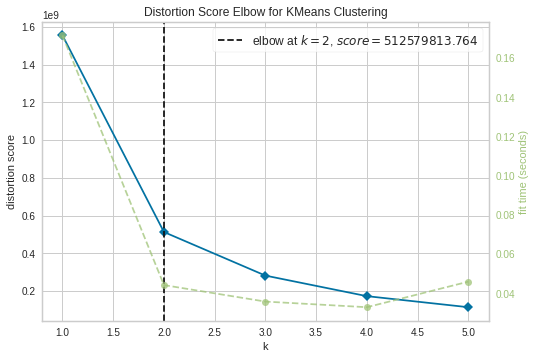

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
# Ajuste de modelo K-Means
# Búsqueda del mejor "K" vía método de codo

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6))

visualizer.fit(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [19]:
#Ajuste del modelo con K óptima

km = KMeans(n_clusters=2).fit(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]])
df_bicis2_g["kmean"] = km.predict(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]])
km.cluster_centers_


array([[  35.93099954, 1480.08895706, 1076.40490798,  403.68404908],
       [  36.1094737 , 4012.21768707, 2918.7414966 , 1093.47619048]])

In [20]:
# Preparación para mapear

coordsk1 = []
coordsk2 = []

datak1 = df_bicis2_g[df_bicis2_g["kmean"]==0]
for lat, lon in zip(datak1["lat"], datak1["lon"]):
  values= [lon,lat]
  coordsk1.append(values)


datak2 = df_bicis2_g[df_bicis2_g["kmean"]==1]
for lat, lon in zip(datak2["lat"], datak2["lon"]):
  values= [lon,lat]
  coordsk2.append(values)


In [21]:
# Visualización de estaciones por cluster de pertenencia

m=folium.Map(location=[19.389485, -99.078364],zoom_start=12)

mcg = MarkerCluster(control=False)
m.add_child(mcg)

g1 = folium.FeatureGroup('Cluster 1')
m.add_child(g1)
g2 = folium.FeatureGroup('Cluster 2')
m.add_child(g2)

for lat,lng,text in zip(datak1["lat"], datak1["lon"],datak1["NOMBRE"]):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="green"),
  ).add_to(g1)

for lat,lng,text in zip(datak2["lat"], datak2["lon"],datak2["NOMBRE"]):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="blue"),
  ).add_to(g2)

l = folium.LayerControl().add_to(m)

m

In [22]:
# Búsqueda de mejores hiperparámetros para DBSCAN

neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC","lat","lon"]])
distances, indices = neighbors_fit.kneighbors(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC","lat","lon"]])

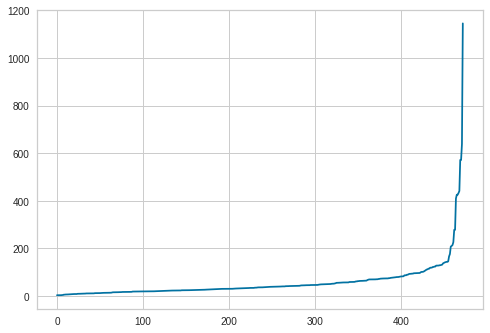

In [23]:
#Valor óptimo de eps

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [24]:
# Ajuste de modelo DBSCAN 

dbscan = DBSCAN(eps=180, min_samples=8).fit(df_bicis2_g[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC","lat","lon"]])
df_bicis2_g["dbscan"]=dbscan.labels_
df_bicis2_g.head()

,SISTEMA,NOMBRE,CP,COLONIA,TIPO,CE_CERCA0,CE_CERCA_1,CE_CERCA_2,CE_CERCA_3,CE_CERCA_4,...,geometry,Ciclo_Estacion_Retiro,Edad_Usuario,Bici,Genero_UsuarioM OHC,Genero_UsuarioF OHC,lon,lat,kmean,dbscan
0,ECOBICI,Río Sena-Río Balsas,6500,Cuauhtémoc,"BIKE,TPV",3,8,85,0,0,...,POINT (-99.16781 19.43357),1.0,38.403389,8379,6095,2284,-99.167809,19.433571,1,-1
1,ECOBICI,Río Guadalquivir - Río Balsas,6500,Cuauhtémoc,BIKE,1,5,0,0,0,...,POINT (-99.17169 19.43139),2.0,36.580574,2718,1685,1033,-99.171695,19.431386,0,0
2,ECOBICI,Reforma - Insurgentes,6500,Ampliación Granada,"BIKE,TPV",8,20,86,0,0,...,POINT (-99.15867 19.43165),3.0,34.237097,3817,2961,856,-99.158668,19.431655,1,1
3,ECOBICI,Río Nilo - Río Panuco,6500,Cuauhtémoc,BIKE,5,8,9,10,0,...,POINT (-99.17171 19.42831),4.0,36.130716,2471,1589,882,-99.171713,19.428309,0,0
4,ECOBICI,Río Pánuco Río Tiber,6500,Cuauhtémoc,BIKE,2,4,9,10,0,...,POINT (-99.16936 19.42972),5.0,37.242002,2657,1992,665,-99.169363,19.429720,0,0


In [25]:
# Preparación de mapa y resultados DBSCAN

print(df_bicis2_g["dbscan"].unique())

coordsk1 = []
coordsk2 = []
coordsk3 = []
#coords1 = data[["lat","lon"]].head().values


datak1 = df_bicis2_g[df_bicis2_g["dbscan"]==-1]
for lat, lon in zip(datak1["lat"], datak1["lon"]):
  values= [lon,lat]
  coordsk1.append(values)


datak2 = df_bicis2_g[df_bicis2_g["dbscan"]==0]
for lat, lon in zip(datak2["lat"], datak2["lon"]):
  values= [lon,lat]
  coordsk2.append(values)

datak3 = df_bicis2_g[df_bicis2_g["dbscan"]==1]
for lat, lon in zip(datak3["lat"], datak3["lon"]):
  values= [lon,lat]
  coordsk3.append(values)

print("\nValores del cluster anómalo: \n")
print(datak1[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]].mean())
print("\nValores del cluster 1: \n")
print(datak2[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]].mean())
print("\nValores del cluster 2: \n")
print(datak3[["Edad_Usuario","Bici","Genero_UsuarioM OHC","Genero_UsuarioF OHC"]].mean())

[-1  0  1]

Valores del cluster anómalo: 

Edad_Usuario             36.184257
Bici                   4437.858974
Genero_UsuarioM OHC    3234.500000
Genero_UsuarioF OHC    1203.358974
dtype: float64

Valores del cluster 1: 

Edad_Usuario             35.942465
Bici                   1744.251323
Genero_UsuarioM OHC    1265.005291
Genero_UsuarioF OHC     479.246032
dtype: float64

Valores del cluster 2: 

Edad_Usuario             36.057337
Bici                   3930.882353
Genero_UsuarioM OHC    2911.764706
Genero_UsuarioF OHC    1019.117647
dtype: float64


In [26]:
# Visualización estación por agrupación DBSCAN
m=folium.Map(location=[19.389485, -99.078364],zoom_start=12)

mcg = MarkerCluster(control=False)
m.add_child(mcg)

g1 = folium.FeatureGroup('Cluster 1')
m.add_child(g1)
g2 = folium.FeatureGroup('Cluster 2')
m.add_child(g2)
g3 = folium.FeatureGroup('Cluster 3')
m.add_child(g3)

for lat,lng,text in zip(datak1["lat"], datak1["lon"],datak1["NOMBRE"]):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="red"),
  ).add_to(g1)

for lat,lng,text in zip(datak2["lat"], datak2["lon"],datak2["NOMBRE"]):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="green"),
  ).add_to(g2)

for lat,lng,text in zip(datak3["lat"], datak3["lon"],datak3["NOMBRE"]):
  folium.Marker(
  location=[lat, lng],
  popup=text,
  icon=folium.Icon(color="blue"),
  ).add_to(g3)

l = folium.LayerControl().add_to(m)

m

### Resultados

* a. Se probaron dos modelos, Kmeans y DBSCAN.<br>
  * El primero fue utilizado como modelo base de clusterización por su sencillez <br>
  * El segundo fue utilizado por sus cualidades en el manejo de información espacial.<br>

Al final Se opto por el modelo DBSCAN al considerar su ventaja en términos espaciales

* b.
  * El número de grupos para Kmeans se calculó mediante el método del codo el cual busca la distorsión mínima (suma de las distancias al cuadrado a cada centroide.) ya que permite tener un cálculo basado en error mínimo lo que lo hace un criterio cuantitativo <br>
  * El número de grupos en DBSCAN no es un hiperparámetro, es un resultado. La manera de ajustar los hiperparámetros fue consiguiendo la distancia óptima entre puntos (eps) y mediante la regla del número de variables multiplicada por 2 (min_points), esto permite buscar una distancia óptima entre puntos para promover una clusterización apropiada, esto es un criterio cuantitativo (eps) y no cuantitativo (min_points) al ser más bien una regla pragmática de uso común.

* c. Para el caso de DBSCAN
  * La edad no tiene un impacto significativo puesto que para los 3 clusters ronda en 36 años. <br>
  * Para el caso del número de retiros, si existen variaciones significativas teniendo que el cluster anómalo tiene más movimiento de bicicletas 4437 en total frente a 1744 y 3930 de los otros dos clusters. <br>
  * Finalmente, la relación de hombres y mujeres es mayor en el cluster 2 que en los otros dos, lo que implica que hay mayor tránsito de mujeres en estas estaciones respecto a los otros dos clusters, no obstante cabe resaltar que en todas las estaciones predomina el tránsito de hombres.


## Probema 3

Usa un modelo estadístico paramétrico para que, a partir de un análisis temporal,
contestes lo siguiente:
* a. ¿En qué estaciones puedes observar una tendencia de uso a la alta?
* b. ¿En qué estaciones puedes observar una tendencia de uso a la baja?
* c. Demuestra tus conclusiones gráficamente, e.g. grafica las tres estaciones con
mayor tendencia de uso al alta y las tres estaciones con menor tendencia de
uso a la baja.

In [27]:
# Conteo por fecha y estacion de bicicletas

df_bicis_vis_R = df_bicis[["Fecha_Retiro","Ciclo_Estacion_Retiro"]].value_counts()
df_bicis_vis_R = pd.DataFrame(df_bicis_vis_R)
df_bicis_vis_R.reset_index(inplace=True)
df_bicis_vis_R.columns = (["fecha_retiro", "Ciclo_Estacion_Retiro","Conteo"])

# Join para obtener los puntos geográficos por fecha y retiro de bicicletas

df_bicis_vis_R = estaciones.merge(df_bicis_vis_R, how="inner", right_on="Ciclo_Estacion_Retiro", left_on="CVE_CE")
df_bicis_vis_R['lon'] = df_bicis_vis_R.centroid.x  
df_bicis_vis_R['lat'] = df_bicis_vis_R.centroid.y
df_bicis_vis_R=df_bicis_vis_R[["lon","lat", "fecha_retiro","Ciclo_Estacion_Retiro", "Conteo"]]
df_bicis_vis_R=df_bicis_vis_R.sort_values("fecha_retiro")
df_bicis_vis_R['Ciclo_Estacion_Retiro'] = df_bicis_vis_R['Ciclo_Estacion_Retiro'].astype(int)
df_bicis_vis_R

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




,lon,lat,fecha_retiro,Ciclo_Estacion_Retiro,Conteo
17784,-99.180334,19.424282,01/06/2021,194,1
43021,-99.184433,19.442127,01/07/2021,476,1
8268,-99.132446,19.431698,01/07/2021,90,1
16725,-99.171390,19.402089,01/07/2021,182,1
39592,-99.176022,19.364808,01/07/2021,437,1
...,...,...,...,...,...
26841,-99.158756,19.394283,31/10/2021,296,16
1826,-99.160206,19.430964,31/10/2021,20,31
4289,-99.166299,19.419515,31/10/2021,47,83
35814,-99.171592,19.372437,31/10/2021,394,9


In [49]:
# Agrupación por fecha y estación con la varaible geográfica

df_grouped = df_bicis_vis_R.groupby(["Ciclo_Estacion_Retiro","fecha_retiro"]).agg({"lon":"mean","lat":"mean","Conteo":"sum"})
df_grouped.reset_index(inplace=True)
df_grouped["fecha_retiro"] = pd.to_datetime(df_grouped["fecha_retiro"], format='%d/%m/%Y' )#dayfirst=True)
df_grouped50=df_grouped[df_grouped["Ciclo_Estacion_Retiro"] == 208]
df_grouped

,Ciclo_Estacion_Retiro,fecha_retiro,lon,lat,Conteo
0,1,2021-08-01,-99.167809,19.433571,45
1,1,2021-09-01,-99.167809,19.433571,75
2,1,2021-10-01,-99.167809,19.433571,93
3,1,2021-08-02,-99.167809,19.433571,100
4,1,2021-09-02,-99.167809,19.433571,78
...,...,...,...,...,...
43389,480,2021-08-30,-99.181654,19.446073,20
43390,480,2021-09-30,-99.181654,19.446073,29
43391,480,2021-10-30,-99.181654,19.446073,20
43392,480,2021-08-31,-99.181654,19.446073,24


In [50]:
# Estacion de prueba

print(df_grouped50["fecha_retiro"].min())
print(df_grouped50["fecha_retiro"].max())
df_grouped50

2021-09-14 00:00:00
2021-10-31 00:00:00


,Ciclo_Estacion_Retiro,fecha_retiro,lon,lat,Conteo
18964,208,2021-10-01,-99.189835,19.434182,47
18965,208,2021-10-02,-99.189835,19.434182,25
18966,208,2021-10-03,-99.189835,19.434182,18
18967,208,2021-10-04,-99.189835,19.434182,25
18968,208,2021-10-05,-99.189835,19.434182,48
18969,208,2021-10-06,-99.189835,19.434182,43
18970,208,2021-10-07,-99.189835,19.434182,40
18971,208,2021-10-08,-99.189835,19.434182,42
18972,208,2021-10-09,-99.189835,19.434182,27
18973,208,2021-10-10,-99.189835,19.434182,24


In [51]:
# Tratamiento de la variable temporal

df_grouped50.sort_values("fecha_retiro",inplace=True)
df_grouped50 = df_grouped50.iloc[1: , :]
df_grouped50["fecha_retiro"].values.reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([['2021-09-15T00:00:00.000000000'],
       ['2021-09-16T00:00:00.000000000'],
       ['2021-09-17T00:00:00.000000000'],
       ['2021-09-18T00:00:00.000000000'],
       ['2021-09-19T00:00:00.000000000'],
       ['2021-09-20T00:00:00.000000000'],
       ['2021-09-21T00:00:00.000000000'],
       ['2021-09-22T00:00:00.000000000'],
       ['2021-09-23T00:00:00.000000000'],
       ['2021-09-24T00:00:00.000000000'],
       ['2021-09-25T00:00:00.000000000'],
       ['2021-09-26T00:00:00.000000000'],
       ['2021-09-27T00:00:00.000000000'],
       ['2021-09-28T00:00:00.000000000'],
       ['2021-09-29T00:00:00.000000000'],
       ['2021-09-30T00:00:00.000000000'],
       ['2021-10-01T00:00:00.000000000'],
       ['2021-10-02T00:00:00.000000000'],
       ['2021-10-03T00:00:00.000000000'],
       ['2021-10-04T00:00:00.000000000'],
       ['2021-10-05T00:00:00.000000000'],
       ['2021-10-06T00:00:00.000000000'],
       ['2021-10-07T00:00:00.000000000'],
       ['2021-10-08T00:00:00.00000

In [52]:
#df_grouped50["fecha_retiro"] = pd.to_datetime(df_grouped50["fecha_retiro"])
#reg = LinearRegression().fit(df_grouped50["fecha_retiro"].values.reshape(-1, 1), df_grouped50["Conteo"])
#reg.coef_[0]

df_grouped50['date_ordinal'] = pd.to_datetime(df_grouped50['fecha_retiro']).apply(lambda date: date.toordinal())
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped50["date_ordinal"], df_grouped50["Conteo"])
slope

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.7180851063829787

In [53]:
# Ajuste para cada estación de una regresión lineal (librería stats)

lista_estacion=[]
lista_coef=[]
lista_inter=[]

for estacion1 in df_grouped["Ciclo_Estacion_Retiro"].unique():
  df = df_grouped[df_grouped["Ciclo_Estacion_Retiro"]== estacion1]
  df.sort_values("fecha_retiro",inplace=True)
  df = df.iloc[1: , :]
  df['date_ordinal'] = pd.to_datetime(df['fecha_retiro']).apply(lambda date: date.toordinal())
  slope, intercept, r_value, p_value, std_err = stats.linregress(df["date_ordinal"], df["Conteo"])

  lista_coef.append(slope)
  lista_estacion.append(estacion1)
  lista_inter.append(intercept)


  # reg = LinearRegression().fit(df["date_ordinal"].values.reshape(-1, 1), df["Conteo"])
  # lista_coef.append(reg.coef_[0])
  # lista_estacion.append(estacion1)
  # lista_inter.append(reg.intercept_)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWa

In [54]:
# Insertar en un DataFrame los resultados de todas las estaciones (regresión)

coeficientes = pd.DataFrame([lista_estacion,lista_coef,lista_inter]).T
coeficientes.columns=["Estacion", "Coeficiente","Intercepto"]

#coeficientes = pd.DataFrame([lista_estacion,lista_coef]).T
#coeficientes.columns=["Estacion", "Coeficiente"]

# Ordenar de mayor a menor pendiente de recta
coeficientes.sort_values("Coeficiente",ascending=False)

,Estacion,Coeficiente,Intercepto
205,208.0,0.718085,-529960.771277
194,197.0,0.416534,-307384.376686
26,27.0,0.409139,-301886.218990
42,43.0,0.407042,-300355.949216
32,33.0,0.392804,-289870.714616
...,...,...,...
330,336.0,-0.049578,36600.292196
145,148.0,-0.055866,41249.706554
156,159.0,-0.105335,77780.802612
208,211.0,-0.105686,78045.165217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



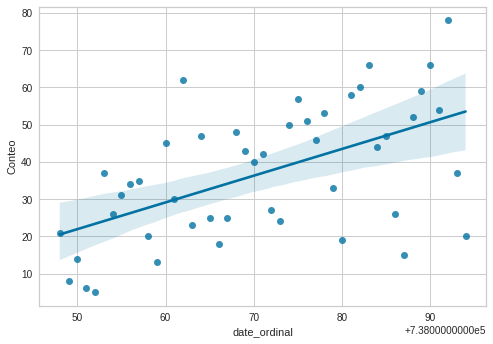

In [34]:
# Visualizaciones top 3 y bottom 3 por pendiente

df_grouped50['date_ordinal'] = pd.to_datetime(df_grouped50['fecha_retiro']).apply(lambda date: date.toordinal())
sns.regplot(x="date_ordinal", y="Conteo", data=df_grouped50);

In [55]:
# Organizar datos para visualización
df_grouped_plot = df_grouped
df_grouped_plot.index = df_grouped_plot["Ciclo_Estacion_Retiro"]
df_grouped_plot.drop("Ciclo_Estacion_Retiro", axis = 1, inplace=True)
df_grouped_plot

,fecha_retiro,lon,lat,Conteo
Ciclo_Estacion_Retiro,,,,
1,2021-08-01,-99.167809,19.433571,45
1,2021-09-01,-99.167809,19.433571,75
1,2021-10-01,-99.167809,19.433571,93
1,2021-08-02,-99.167809,19.433571,100
1,2021-09-02,-99.167809,19.433571,78
...,...,...,...,...
480,2021-08-30,-99.181654,19.446073,20
480,2021-09-30,-99.181654,19.446073,29
480,2021-10-30,-99.181654,19.446073,20


In [57]:
# Organizar datos para visualización, cambios en el formato del tiempo
df_grouped_plot['date_ordinal'] = pd.to_datetime(df_grouped_plot['fecha_retiro']).apply(lambda date: date.toordinal())
df_grouped_plot

,fecha_retiro,lon,lat,Conteo,date_ordinal
Ciclo_Estacion_Retiro,,,,,
1,2021-08-01,-99.167809,19.433571,45,738003
1,2021-09-01,-99.167809,19.433571,75,738034
1,2021-10-01,-99.167809,19.433571,93,738064
1,2021-08-02,-99.167809,19.433571,100,738004
1,2021-09-02,-99.167809,19.433571,78,738035
...,...,...,...,...,...
480,2021-08-30,-99.181654,19.446073,20,738032
480,2021-09-30,-99.181654,19.446073,29,738063
480,2021-10-30,-99.181654,19.446073,20,738093


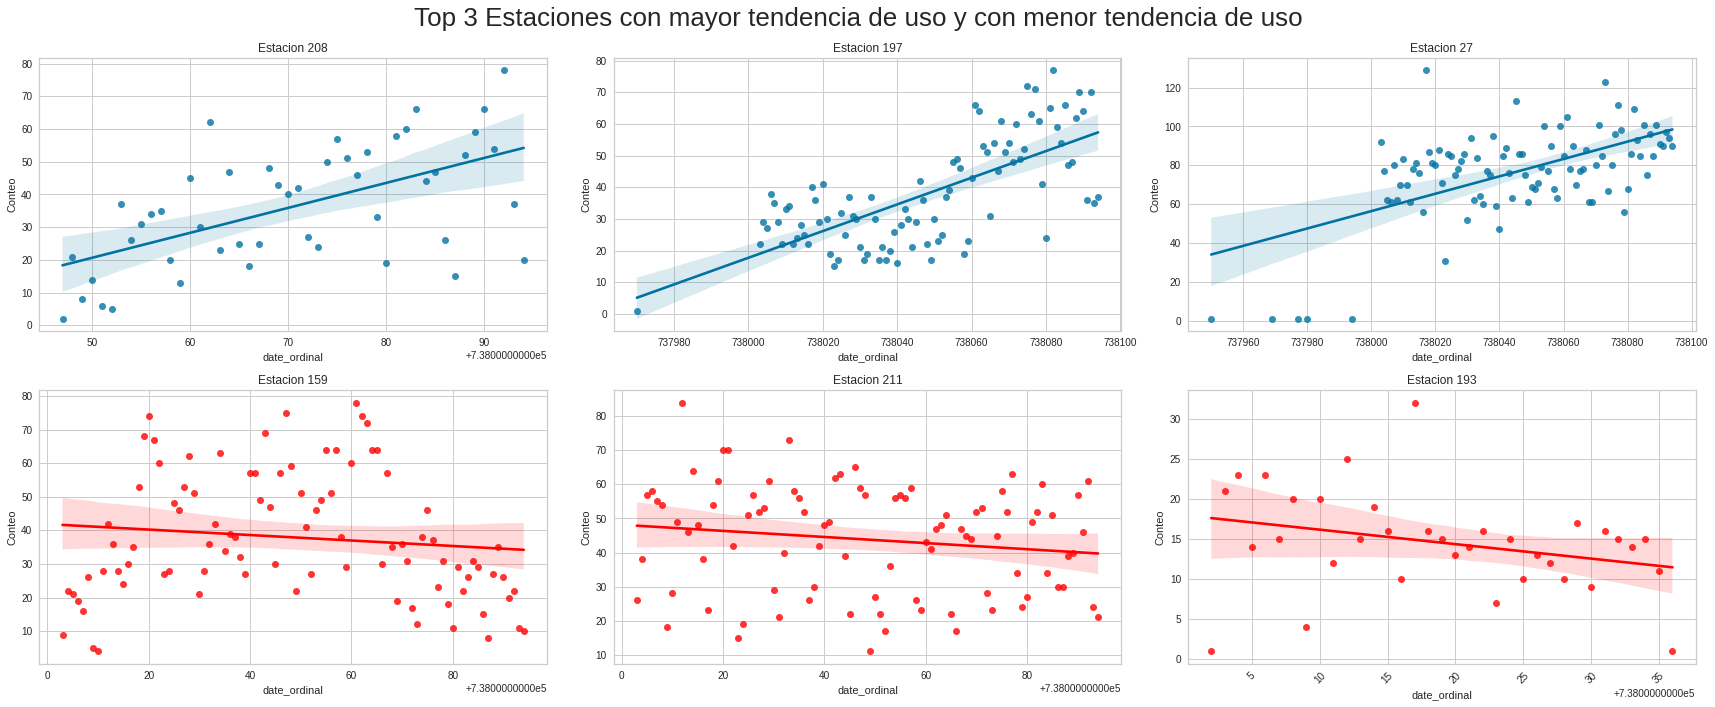

In [91]:
# Visualización de eataciones con mayor y menor tendencia de uso

f, axes = plt.subplots(2, 3,figsize=(24, 10))
axe = axes.ravel()

sns.regplot(x='date_ordinal', y='Conteo', data=df_grouped_plot.loc[208], ax=axe[0])
sns.regplot(x='date_ordinal', y='Conteo', data=df_grouped_plot.loc[197], ax=axe[1])
sns.regplot(x='date_ordinal',y='Conteo', data=df_grouped_plot.loc[27], ax=axe[2])
sns.regplot(x='date_ordinal', y='Conteo', data=df_grouped_plot.loc[159], color="red", ax=axe[3])
sns.regplot(x='date_ordinal', y='Conteo', data=df_grouped_plot.loc[211], color="red", ax=axe[4])
sns.regplot(x='date_ordinal',y='Conteo', data=df_grouped_plot.loc[193], color="red", ax=axe[5])

axe[0].set_title('Estacion 208')
axe[1].set_title('Estacion 197')
axe[2].set_title('Estacion 27')

axe[3].set_title('Estacion 159')
axe[4].set_title('Estacion 211')
axe[5].set_title('Estacion 193')

f.suptitle("Top 3 Estaciones con mayor tendencia de uso y con menor tendencia de uso", fontsize=26)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Resultados

* a. La estación con la mayor tendencia ak alza  es la 205 con incrementeos 0.71 retiros cada día
* b. La estación con la mayor tendencia a la baja es la 190 con -0.26 retiros cada día
* c. Gráficos anteriores

Usa un modelo estadístico paramétrico para que, a partir de un análisis temporal,
contestes lo siguiente:
* a. ¿En qué estaciones puedes observar una tendencia de uso a la alta?
* b. ¿En qué estaciones puedes observar una tendencia de uso a la baja?
* c. Demuestra tus conclusiones gráficamente, e.g. grafica las tres estaciones con
mayor tendencia de uso al alta y las tres estaciones con menor tendencia de
uso a la baja.

## Problema 4

En el sitio de Ecobici puedes consultar el Mapa de movilidad. Analízalo a
profundidad y recomienda una arquitectura utilizando servicios de cualquier proveedor
cloud para realizar solo la visualización del mapa (solo proponla, no es necesario que
la construyas).
Esta debe contemplar la ingesta de los datos que requieres para realizar la
visualización, cómo y en qué los almacenarías, el framework y sus complementos
mínimos para construir la visualización, etc.

* a. Debes incluir un diagrama de la arquitectura propuesta.
* b. Si deseas, agrega una redacción explicando la arquitectura.

### Resultados
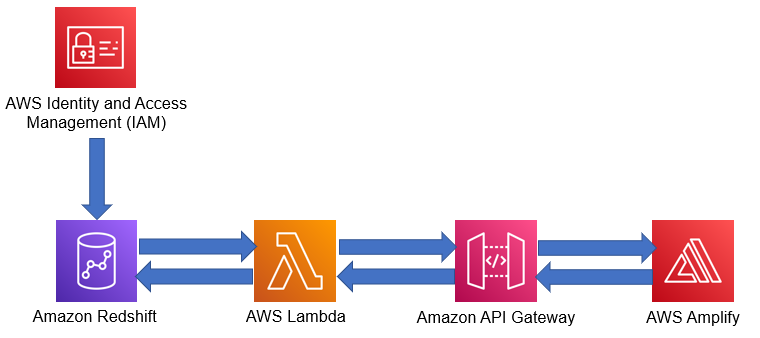

Esta primera solución radica en el uso de una base de datos para alimentar el mapa, pasar la información mediante una API para poder modificar potenciales campos modificables por el usuario (como fecha) consultados directo desde la base de datos y conectados mediante una lambda.

Finalmente, esta información se consulta directamente por AWS Amplify mediante HTML, JavaScript y Leaflet.

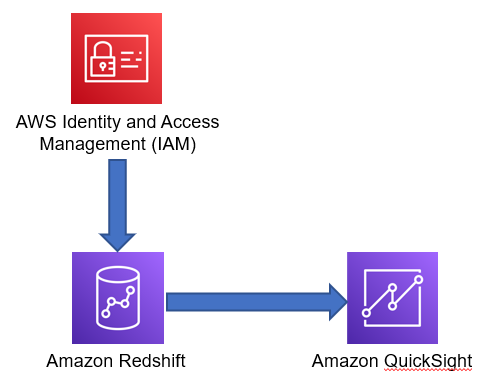

Una solución rápida que si bien no permite replicar exactamente el mapa (como la solución anterior) permite una aproximación en una situación donde se requiera un resultado rápido.